In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df['cp'].value_counts()

4

In [35]:
col_with_categorical_data = []
for col in df.columns:
    if len(df[col].value_counts()) <= 5:
        col_with_categorical_data.append(col)
        print(df[col].value_counts())
        print('--------------------------')

sex
1    207
0     96
Name: count, dtype: int64
--------------------------
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
--------------------------
fbs
0    258
1     45
Name: count, dtype: int64
--------------------------
restecg
1    152
0    147
2      4
Name: count, dtype: int64
--------------------------
exang
0    204
1     99
Name: count, dtype: int64
--------------------------
slope
2    142
1    140
0     21
Name: count, dtype: int64
--------------------------
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
--------------------------
thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64
--------------------------
target
1    165
0    138
Name: count, dtype: int64
--------------------------


<Axes: ylabel='Density'>

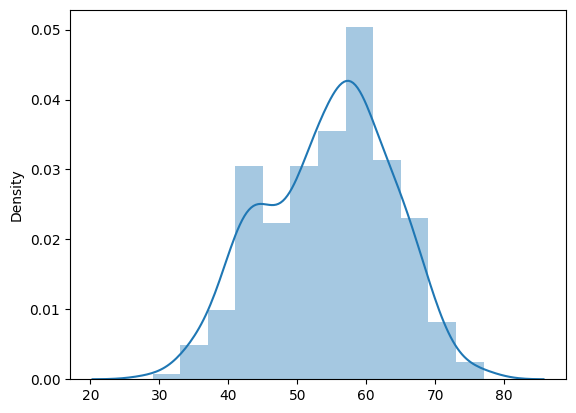

In [17]:
sns.distplot(x=df['age'])

<Axes: xlabel='target', ylabel='age'>

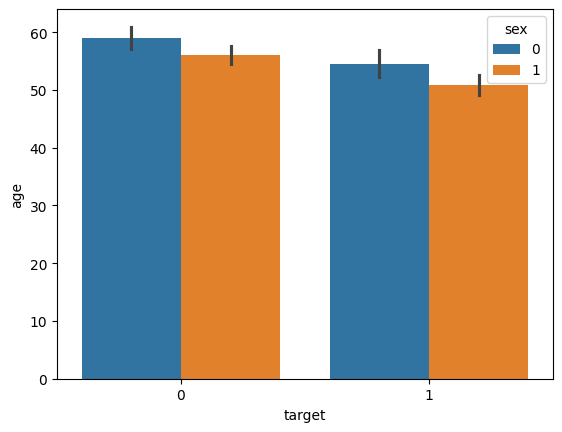

In [21]:
sns.barplot(x='target', y='age', data=df, hue='sex')

<Axes: ylabel='Density'>

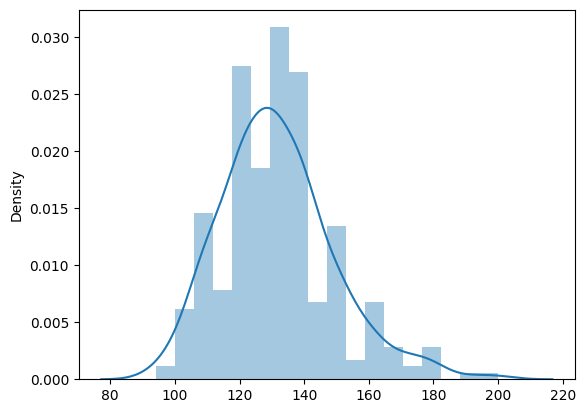

In [22]:
sns.distplot(x=df['trestbps'])

<Axes: ylabel='Density'>

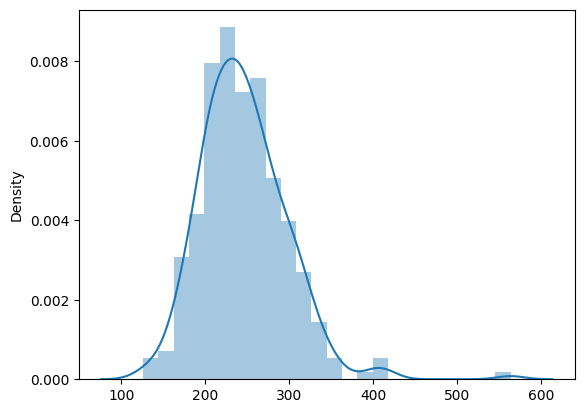

In [23]:
sns.distplot(x=df['chol'])

In [27]:
X = df.drop(columns='target')
Y = df['target']

In [53]:
models = [LogisticRegression(max_iter=1000), 
          RandomForestClassifier(), 
          SVC(kernel='linear'),
          KNeighborsClassifier()]


In [54]:
def compare_models(models, X, Y):
    for model in models:
        cv_scores = cross_val_score(model, X, Y, cv=5)
        mean_accuracy = sum(cv_scores)/len(cv_scores) * 100
        mean_accuracy = round(mean_accuracy, 2)
        print(f"cross validation accuracies for the : {model} is {cv_scores}")
        print(f"total accuracy : {mean_accuracy}%")
        print('-----------------------------------')
        

In [55]:
compare_models(models, X, Y)

cross validation accuracies for the : LogisticRegression(max_iter=1000) is [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
total accuracy : 82.83%
-----------------------------------
cross validation accuracies for the : RandomForestClassifier() is [0.81967213 0.8852459  0.80327869 0.81666667 0.75      ]
total accuracy : 81.5%
-----------------------------------
cross validation accuracies for the : SVC(kernel='linear') is [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
total accuracy : 82.83%
-----------------------------------
cross validation accuracies for the : KNeighborsClassifier() is [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
total accuracy : 64.39%
-----------------------------------


## now lets standarsize the data

In [39]:
numerical_cols = [col for col in df.columns if col not in col_with_categorical_data]
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [40]:
df_with_numerical_data = df[numerical_cols]
df_with_numerical_data

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [43]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_with_numerical_data)

In [44]:
scaled_features

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [51]:
new_df = pd.concat([pd.DataFrame(columns=numerical_cols, data=scaled_features), df[col_with_categorical_data]], axis=1)

In [52]:
new_X = new_df.drop(columns='target')
new_Y = new_df['target']

In [57]:
models = [LogisticRegression(max_iter=1000), 
          RandomForestClassifier(), 
          SVC(kernel='linear'),
          KNeighborsClassifier()]

In [58]:
compare_models(models, new_X, new_Y)

cross validation accuracies for the : LogisticRegression(max_iter=1000) is [0.81967213 0.8852459  0.85245902 0.86666667 0.75      ]
total accuracy : 83.48%
-----------------------------------
cross validation accuracies for the : RandomForestClassifier() is [0.85245902 0.8852459  0.80327869 0.78333333 0.76666667]
total accuracy : 81.82%
-----------------------------------
cross validation accuracies for the : SVC(kernel='linear') is [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
total accuracy : 82.83%
-----------------------------------
cross validation accuracies for the : KNeighborsClassifier() is [0.78688525 0.80327869 0.80327869 0.85       0.73333333]
total accuracy : 79.54%
-----------------------------------
